In [1]:
# project: p6
# submitter: jchalem
# partner: none
# hours: 8

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
gdf = gpd.read_file('counties.geojson')

In [4]:
#q1

len(gdf["NAME"].unique())

72

<AxesSubplot:>

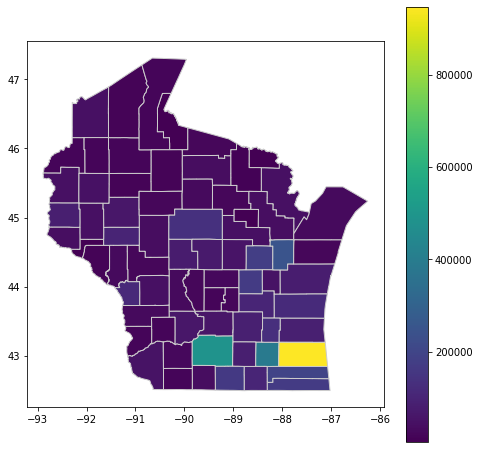

In [5]:
#q2

fig, ax = plt.subplots(figsize = (8,8))
gdf.plot(ax = ax, column = "POP100", cmap="viridis", edgecolor="0.8", figsize=(8,8), legend = True)

In [6]:
conn = sqlite3.connect("counties_tracts.db")
county = pd.read_sql("""SELECT * FROM counties""", conn)
tract = pd.read_sql("""SELECT * FROM tracts""", conn)

In [7]:
gdf["AREALAND"] = county["AREALAND"]
train, test = train_test_split(gdf, 
                               random_state = 320, 
                              test_size = 0.25)

In [8]:
#q3

list(test["NAME"])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [9]:
#q4

model = LinearRegression()
model.fit(train[["AREALAND"]], train["POP100"])
model.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [10]:
#q5

val = np.int64(500 * 2.59 * 1000000)
predict_df = pd.DataFrame({"AREALAND": [val]})
predict_df["predicted_pop"] = model.predict(predict_df)
predict_df["predicted_pop"][0]

82032.53073541154

In [11]:
gdf2 = pd.read_sql("""
SELECT counties.[index], tracts.COUNTY, SUM(tracts.HU100) as HU100, counties.NAME, counties.AREALAND, counties.AREAWATER
FROM counties 
INNER JOIN tracts
ON counties.COUNTY = tracts.COUNTY
GROUP BY counties.COUNTY
ORDER BY counties.[index]
""", conn)
gdf2["POP100"] = gdf["POP100"]

In [12]:
train2, test2 = train_test_split(gdf2, 
                               random_state = 320, 
                              test_size = 0.25)

In [13]:
#q6

list(test2["NAME"])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [14]:
#q7

pd.Series(list(train2['HU100']), list(train2['NAME'])).to_dict()

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [15]:
#q8

model2 = LinearRegression()
model2.fit(train2[["HU100"]], train2["POP100"])
model2.score(test2[["HU100"]], test2["POP100"])
scores = cross_val_score(model2, train2[["HU100"]], train2["POP100"], cv = 5)
scores.mean()

0.9652534544116037

In [16]:
#q9

scores.std()

0.03704265206670459

In [17]:
#q10

"POP100 = " + str(np.round(model2.coef_[0], 2)) + "*HU100 + "  + str(np.round(model2.intercept_, 2))

'POP100 = 2.39*HU100 + -7910.46'

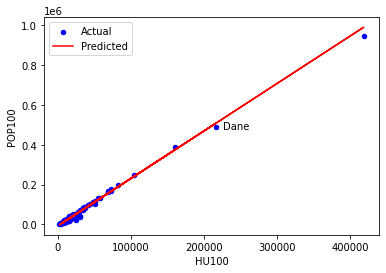

In [18]:
#q11

gdf2["predicted_POP100"] = model2.predict(gdf2[["HU100"]])
ax = gdf2.plot.scatter(x="HU100", y="POP100", color="blue", label = "Actual")
ax = gdf2.plot.line(x="HU100", y="predicted_POP100", ax = ax, color="red", label = "Predicted")
xval = int(gdf2.loc[gdf2["NAME"] == "Dane County"]["HU100"])
yval = int(gdf2.loc[gdf2["NAME"] == "Dane County"]["POP100"])
ax = ax.text(xval + 10000, yval - 10000, "Dane")

In [19]:
#q12

A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

len(A[(A >= 2) & (A <= 5)])

12

In [20]:
import rasterio
from rasterio.mask import mask
land = rasterio.open("zip://../p6/land.zip!wi.tif")

In [21]:
mil = gdf.loc[gdf["NAME"] == "Milwaukee County"]

In [22]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

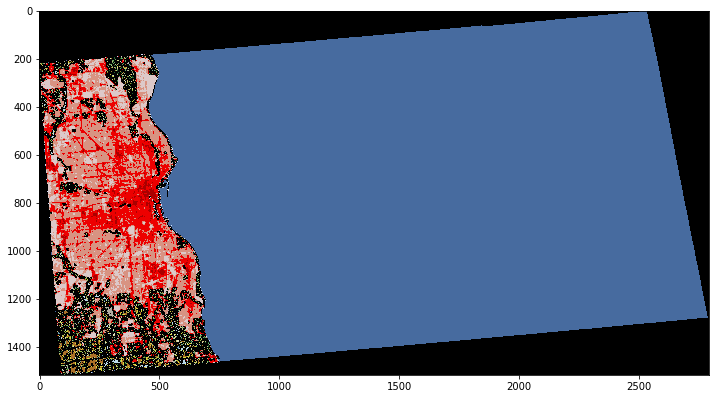

In [23]:
#q13

fig, ax = plt.subplots(figsize=(12,12))
matrix, _ = mask(land, mil.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
ax = ax.imshow(matrix, cmap = custom_cmap, vmin=0, vmax=255)

In [24]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [25]:
#q14

new_matrix = matrix[matrix != 0]
water = land_use["open_water"]
len(new_matrix[new_matrix == water]) / len(new_matrix)

0.7963037455950543

In [26]:
land_type_list = []
for i in gdf["NAME"]:
    temp_county = gdf.loc[gdf["NAME"] == i]
    matrix, _ = mask(land, temp_county.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    land_type_list.append(matrix)

In [27]:
gdf["land_types"] = pd.Series(land_type_list)

In [28]:
land_types = gdf["land_types"]
crops_idx = land_use["crops"]
crops_count = []
for l in land_types:
    crops_count.append((l==crops_idx).sum())
gdf["Crop Count"] = pd.Series(crops_count)

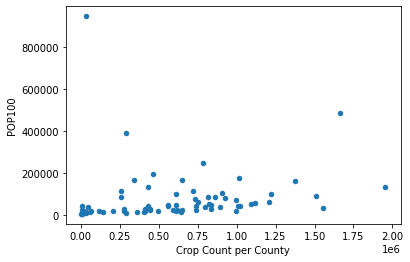

In [29]:
#q15

ax = gdf.plot.scatter(x="Crop Count", y="POP100", 
                      xlabel = "Crop Count per County", ylabel = "POP100")

In [30]:
tractsdf = gpd.read_file('tracts.geojson')

In [31]:
land_type_list = []
for i in tractsdf.index:
    temp_county = tractsdf.loc[tractsdf.index == i]
    matrix2, _ = mask(land, temp_county.to_crs(land.crs)["geometry"], crop=True)
    matrix2 = matrix2[0]
    land_type_list.append(matrix2)

In [32]:
tractsdf["land_types"] = pd.Series(land_type_list)

In [33]:
dev_dict = {}
for k in land_use:
    if k.startswith("developed"):
        dev_dict[k] = land_use[k]

In [34]:
land_types = tractsdf["land_types"]
for key in dev_dict:
    land_count = []
    for l in land_types:
        land_count.append((l==dev_dict[key]).sum())
    tractsdf[key] = pd.Series(land_count)

In [35]:
train3, test3 = train_test_split(tractsdf, 
                               random_state = 320, 
                              test_size = 0.25)

In [36]:
pipe = Pipeline([
    ("pf", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression()),
])

In [37]:
model_pipe = cross_val_score(pipe, 
                             train3[["developed_open","developed_low","developed_med","developed_high"]], 
                             train3["POP100"], cv = 5)
model_nopipe = cross_val_score(LinearRegression(), 
                             train3[["developed_open","developed_low","developed_med","developed_high"]], 
                             train3["POP100"], cv = 5)

In [38]:
print("Mean of model with pipe " + str(model_pipe.mean()))
print("Mean of model with no pipe " + str(model_nopipe.mean()))
print("Standard deviation of model with pipe " + str(model_pipe.std()))
print("Standard deviation of model no with pipe " + str(model_nopipe.std()))

Mean of model with pipe 0.47071424228314385
Mean of model with no pipe 0.43403274200348446
Standard deviation of model with pipe 0.03529229651154435
Standard deviation of model no with pipe 0.03676322442982483


The model with the pipeline is better for a couple of reasons. First, the mean is higher and the standard deviation is lower. Also, it makes sense intuitively to use polynomial features. As more and more land becomes developed, more and more people will move to the area. This can happen exponentially due to the large numbers that people move to a location.

Text(0, 0.5, 'R^2 Score')

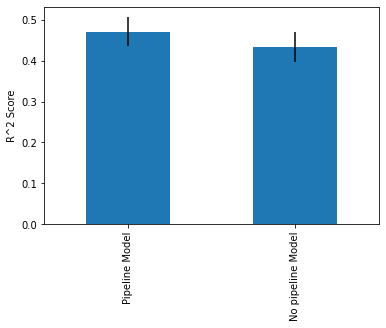

In [39]:
#q16

avg = pd.Series({"Pipeline Model": model_pipe.mean(), "No pipeline Model": model_nopipe.mean()})
std = pd.Series({"Pipeline Model": model_pipe.std(), "No pipeline Model": model_nopipe.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [40]:
#q17

xcols = ["developed_open","developed_low","developed_med","developed_high"]
pipe.fit(test3[xcols], test3["POP100"])
pipe.score(test3[xcols], test3["POP100"])

0.5101888809008888